## Step 1: Importing Important Libraries and Loading the Data Sets

In [71]:
# Importing Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import IncrementalPCA

from IPython.display import Image
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading the Data Sets
news_train = pd.read_csv("train.csv")
news_test = pd.read_csv("test.csv")
data_dict = pd.read_csv("data_dictionary.csv")
sample = pd.read_csv("sample.csv")

In [6]:
# Predicting the shapes of the above data sets in their respective
# order
print(news_train.shape)
print(news_test.shape)
print(data_dict.shape)
print(sample.shape)



(29733, 61)
(9911, 60)
(61, 3)
(9911, 2)


In [7]:
# Looking at the news_train data set
news_train.head()

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,http://mashable.com/2013/03/15/build-arduino-p...,8.0,211.0,0.629808,1.0,0.800000,6.0,3.0,0.0,0.0,4.606635,8.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2300.0,797.714286,0.0,617900.0,115912.500000,0.000000,5103.042553,2568.648709,2000.0,2000.0,2000.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025025,0.025047,0.025012,0.025377,0.899540,0.647421,0.182837,0.033175,0.004739,0.875000,0.125000,0.413435,0.100000,0.6,-0.100000,NaN,-0.100000,1.000000,0.600000,0.500000,0.600000,36700
1,1,http://mashable.com/2013/09/04/edible-bar-codes/,12.0,416.0,0.603535,1.0,0.663580,22.0,7.0,1.0,16.0,5.004808,7.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,768.0,259.400000,0.0,NaN,169071.428571,0.000000,3339.790199,2112.665837,658.0,13700.0,4477.25,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.170984,0.029080,0.028572,0.742792,0.028572,0.449248,0.148915,0.038462,NaN,0.800000,0.200000,0.324716,0.033333,1.0,-0.228621,-0.5000,-0.071429,0.000000,0.000000,0.500000,0.000000,24200
2,2,http://mashable.com/2014/06/20/non-player-char...,7.0,229.0,0.638393,1.0,0.746479,9.0,4.0,1.0,1.0,4.829694,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1100.0,472.625000,4800.0,843300.0,204837.500000,1575.400000,3562.101631,2589.125480,4800.0,NaN,4800.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025046,0.025041,0.025001,0.025000,0.899912,0.353209,0.116600,0.034934,0.021834,NaN,0.384615,0.354545,0.050000,1.0,-0.260833,-0.5000,-0.166667,0.000000,0.000000,0.500000,0.000000,945
3,3,http://mashable.com/2014/08/06/food-art-vine-c...,9.0,473.0,0.542373,1.0,0.752809,7.0,0.0,1.0,1.0,4.634249,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,447.0,150.400000,0.0,843300.0,229728.571429,0.000000,3504.933802,NaN,0.0,0.0,0.00,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.028580,0.028581,0.028577,0.166853,0.747408,0.548957,0.254370,0.065539,0.010571,0.861111,0.138889,0.356253,0.136364,0.7,-0.167500,-0.2500,-0.100000,0.000000,0.000000,0.500000,0.000000,844
4,4,http://mashable.com/2014/12/17/blackberry-clas...,13.0,1097.0,0.505213,1.0,0.676343,10.0,4.0,14.0,0.0,4.678213,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1200.0,299.250000,33100.0,843300.0,381925.000000,2822.635182,5418.750000,3668.285640,1400.0,2300.0,2000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050004,0.052276,0.050148,0.797536,0.050036,0.436525,0.156793,0.041021,0.010027,0.803571,0.196429,0.366255,0.033333,1.0,-0.193182,-0.3125,-0.100000,0.383333,0.166667,0.116667,0.166667,551


In [8]:
# looking at the news_test data set
news_test.head()

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,29733,http://mashable.com/2014/12/05/2014-cant-unsee/,10.0,564.0,0.505618,1.0,0.637394,21.0,1.0,0.0,3.0,4.723404,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,442.0,128.000000,23700.0,843300.0,340780.000000,2154.061235,3702.951220,2994.958581,2300.0,2300.0,2300.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.040069,0.839887,0.040038,0.040006,0.442277,0.053681,0.037234,0.019504,0.65625,0.343750,0.269218,0.062500,0.6,-0.263636,-0.700000,-0.10,1.0,0.0,0.5,0.0
1,29734,http://mashable.com/2014/01/02/twitter-new-yea...,12.0,1127.0,0.431298,1.0,0.621622,10.0,6.0,11.0,0.0,4.360248,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,733.0,254.875000,6300.0,843300.0,140325.000000,1671.078652,4040.166667,2704.175559,3500.0,6300.0,4900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.025053,0.025040,0.025003,0.025000,0.899904,0.425115,0.159958,0.042591,0.014197,0.75000,0.250000,0.420924,0.033333,1.0,-0.243341,-0.714286,NaN,0.0,0.0,0.5,0.0
2,29735,http://mashable.com/2014/06/11/gopro-value-3-b...,10.0,400.0,0.564232,1.0,0.698795,1.0,0.0,1.0,1.0,4.765000,7.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,784.0,283.285714,6800.0,843300.0,166071.428571,1828.500000,3575.518291,2645.535689,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028572,0.885666,0.028572,0.028620,0.028572,0.548466,0.011693,0.047500,0.032500,0.59375,0.406250,0.312286,0.136364,0.5,-0.354808,-0.800000,-0.15,0.0,0.0,0.5,0.0
3,29736,http://mashable.com/2014/10/08/spanish-ebola-d...,12.0,798.0,0.435279,1.0,0.613054,2.0,2.0,3.0,1.0,3.984962,9.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,796.0,284.222222,1800.0,843300.0,325322.222222,1059.333333,7735.494465,3966.507513,6300.0,6300.0,6300.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.022223,0.495422,0.022223,0.437909,0.022223,0.537687,0.028463,0.047619,0.033835,NaN,0.415385,0.359650,0.136364,1.0,-0.362912,-1.000000,-0.05,0.0,0.0,0.5,0.0
4,29737,http://mashable.com/2014/02/09/jennifer-lawren...,11.0,1010.0,0.464503,1.0,0.611727,32.0,2.0,1.0,0.0,5.180198,8.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,269.0,91.714286,0.0,843300.0,214137.500000,0.000000,3583.632001,2030.692327,1500.0,NaN,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.025536,0.025047,0.899314,0.025101,0.025002,0.412513,0.104127,0.025743,0.013861,0.65000,0.350000,0.375991,0.100000,0.8,-0.264286,-0.500000,NaN,0.0,0.0,0.5,0.0


The above data set 'news_test' DOES NOT have the 'shares' column

In [9]:
# Looking at the data_dict data set
data_dict.head(61)

,Unnamed: 0,column,description
0,0,url,URL of the article (non-predictive)
1,1,timedelta,Days between the article publication and the d...
2,2,ntokenstitle,Number of words in the title
3,3,ntokenscontent,Number of words in the content
4,4,nuniquetokens,Rate of unique words in the content
5,5,nnonstop_words,Rate of non-stop words in the content
6,6,nnonstopuniquetokens,Rate of unique non-stop words in the content
7,7,num_hrefs,Number of links
8,8,numselfhrefs,Number of links to other articles published by...
9,9,num_imgs,Number of images


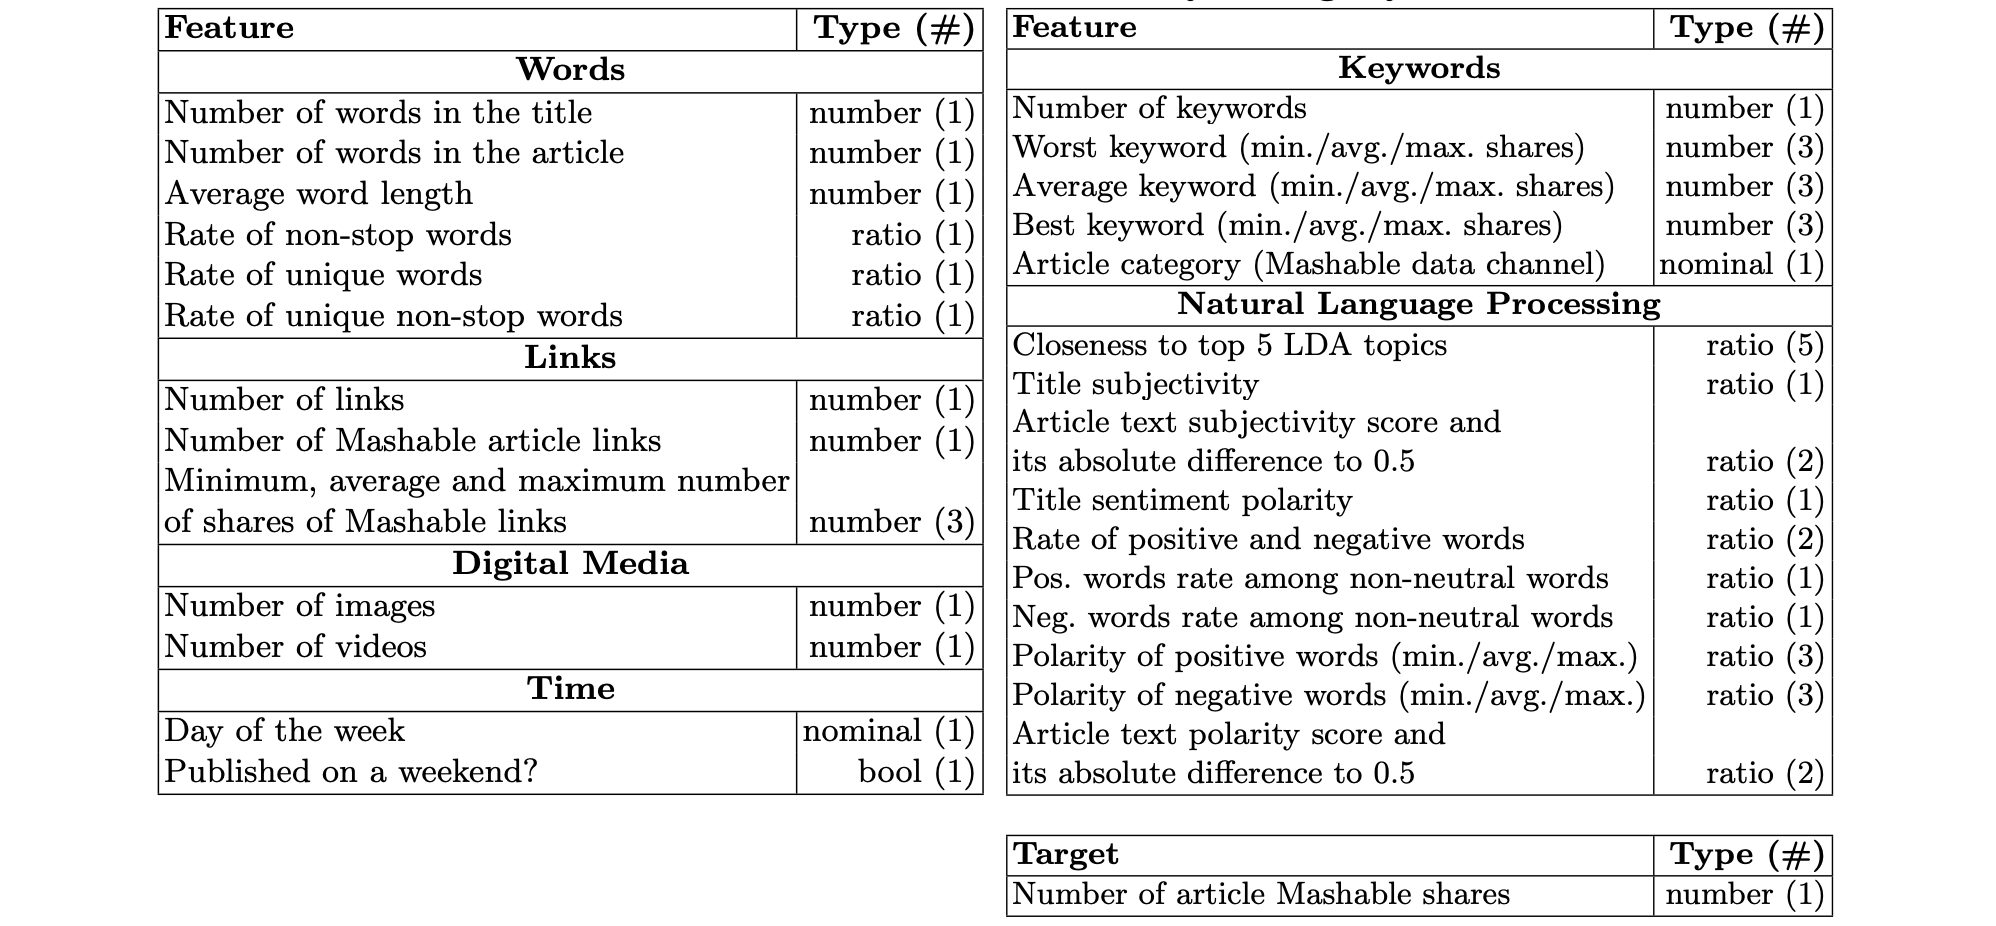

In [10]:
# Displaying Features in the form of an Image
Image('features.png')

## Step 2: Data Understanding

In [11]:
# Understanding the 'news_train' data set
news_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             29733 non-null  int64  
 1   url                            29733 non-null  object 
 2   n_tokens_title                 29733 non-null  float64
 3   n_tokens_content               29733 non-null  float64
 4   n_unique_tokens                29733 non-null  float64
 5   n_non_stop_words               29733 non-null  float64
 6   n_non_stop_unique_tokens       29733 non-null  float64
 7   num_hrefs                      28921 non-null  float64
 8   num_self_hrefs                 25200 non-null  float64
 9   num_imgs                       24326 non-null  float64
 10  num_videos                     29146 non-null  float64
 11  average_token_length           29733 non-null  float64
 12  num_keywords                   29269 non-null 

In [12]:
# Statistical description of 'news_train' data set
news_train.describe()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,28921.000000,25200.000000,24326.000000,29146.000000,29733.000000,29269.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,28649.000000,29277.000000,29649.000000,29596.000000,28218.000000,29616.000000,29428.000000,29052.000000,28760.000000,29449.000000,27971.000000,29409.000000,28752.000000,28980.000000,28179.000000,29434.000000,28867.000000,29642.000000,28237.000000,27565.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,27487.000000,29382.000000,28898.000000,28845.000000,29146.000000,29140.000000,28495.000000,29288.000000,29584.000000,29546.000000,28951.000000,29021.000000,29605.000000,29466.000000,28934.000000,28276.000000,29733.000000
mean,14866.000000,10.403861,545.376652,0.554071,1.004238,0.694586,10.866706,3.285397,4.512785,1.263364,4.542961,7.217978,0.052669,0.175327,0.158275,0.058386,0.185047,0.213870,25.835945,1154.769238,311.128475,13653.678571,753460.486214,259904.903376,1121.525349,5658.801071,3141.089645,3949.202204,10461.340237,6426.079278,0.167884,0.186784,0.187516,0.184073,0.142966,0.061905,0.068102,0.129766,0.185391,0.140411,0.217210,0.223688,0.233266,0.443130,0.118950,0.039554,0.016590,0.681376,0.287926,0.353170,0.095636,0.755106,-0.259057,-0.521207,-0.106996,0.282072,0.071137,0.342417,0.155628,3439.840581
std,8583.322113,2.122101,471.476136,4.064623,6.039790,3.768884,11.384882,3.851624,8.335517,4.158469,0.855936,1.912259,0.223375,0.380253,0.365005,0.234476,0.388342,0.410043,69.316700,4008.595967,623.943555,57864.532067,213165.450292,135215.399335,1136.661797,6094.277266,1323.734009,18771.379524,41548.116050,23705.054711,0.373770,0.389745,0.390332,0.387550,0.350044,0.240988,0.251926,0.336052,0.264106,0.218503,0.283237,0.295239,0.288963,0.117417,0.096957,0.017454,0.010783,0.191247,0.156156,0.105223,0.071699,0.248494,0.128085,0.291191,0.095238,0.324263,0.265052,0.188547,0.226089,12212.123341
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,7433.000000,9.000000,245.000000,0.471376,1.000000,0.626598,4.000000,1.000000,1.000000,0.000000,4.477124,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,444.000000,141.000000,0.000000,843300.000000,173296.428572,0.000000,3562.101631,2386.456742,636.000000,1100.000000,980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025060,0.025013,0.028571,0.028571,0.0285

In [13]:
# Checking the Number of Missing Values for 'news_train' data set
missing_values_perc = round(100*(news_train.isnull().sum()/len(news_train.index)),2)
missing_values_perc

id                                0.00
url                               0.00
n_tokens_title                    0.00
n_tokens_content                  0.00
n_unique_tokens                   0.00
n_non_stop_words                  0.00
n_non_stop_unique_tokens          0.00
num_hrefs                         2.73
num_self_hrefs                   15.25
num_imgs                         18.19
num_videos                        1.97
average_token_length              0.00
num_keywords                      1.56
data_channel_is_lifestyle         0.00
data_channel_is_entertainment     0.00
data_channel_is_bus               0.00
data_channel_is_socmed            0.00
data_channel_is_tech              0.00
data_channel_is_world             0.00
kw_min_min                        3.65
kw_max_min                        1.53
kw_avg_min                        0.28
kw_min_max                        0.46
kw_max_max                        5.10
kw_avg_max                        0.39
kw_min_avg               

In [14]:
# Now Checking the null values of 'news_train' in descending order
news_train.isnull().sum().sort_values(ascending=False)

num_imgs                         5407
num_self_hrefs                   4533
global_subjectivity              2246
is_weekend                       2168
self_reference_max_shares        1762
weekday_is_wednesday             1554
kw_max_max                       1515
weekday_is_sunday                1496
abs_title_sentiment_polarity     1457
avg_positive_polarity            1238
kw_min_min                       1084
weekday_is_monday                 981
kw_avg_avg                        973
global_rate_negative_words        888
weekday_is_friday                 866
global_rate_positive_words        835
num_hrefs                         812
abs_title_subjectivity            799
min_negative_polarity             782
weekday_is_tuesday                753
max_negative_polarity             712
kw_max_avg                        681
rate_negative_words               593
num_videos                        587
rate_positive_words               587
num_keywords                      464
kw_max_min  

## Step 3: Data Cleaning

In [15]:
# Checking datatype of each variable from 'news_train' data set
news_train.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             29733 non-null  int64  
 1   url                            29733 non-null  object 
 2   n_tokens_title                 29733 non-null  float64
 3   n_tokens_content               29733 non-null  float64
 4   n_unique_tokens                29733 non-null  float64
 5   n_non_stop_words               29733 non-null  float64
 6   n_non_stop_unique_tokens       29733 non-null  float64
 7   num_hrefs                      28921 non-null  float64
 8   num_self_hrefs                 25200 non-null  float64
 9   num_imgs                       24326 non-null  float64
 10  num_videos                     29146 non-null  float64
 11  average_token_length           29733 non-null  float64
 12  num_keywords                   29269 non-null 

In [16]:
# checking the shape of news_train data again
news_train.shape

(29733, 61)

In [17]:
# Now checking if there are columns with one unique value 
news_train.nunique(dropna=True)

id                               29733
url                              29733
n_tokens_title                      20
n_tokens_content                  2250
n_unique_tokens                  21820
n_non_stop_words                  1404
n_non_stop_unique_tokens         18703
num_hrefs                          124
num_self_hrefs                      55
num_imgs                            86
num_videos                          52
average_token_length             23555
num_keywords                        10
data_channel_is_lifestyle            2
data_channel_is_entertainment        2
data_channel_is_bus                  2
data_channel_is_socmed               2
data_channel_is_tech                 2
data_channel_is_world                2
kw_min_min                          23
kw_max_min                        1038
kw_avg_min                       14367
kw_min_max                         957
kw_max_max                          30
kw_avg_max                       24057
kw_min_avg               

#### from the above, we can observe that we don't have any columns with a unique value, so we don't have to do anything here.

In [18]:
# Dropping the 'url' column as it is non-predictive according to
# the data dictionary
news_train.drop(['url','id'],axis=1,inplace=True)

In [19]:
news_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 29733 non-null  float64
 1   n_tokens_content               29733 non-null  float64
 2   n_unique_tokens                29733 non-null  float64
 3   n_non_stop_words               29733 non-null  float64
 4   n_non_stop_unique_tokens       29733 non-null  float64
 5   num_hrefs                      28921 non-null  float64
 6   num_self_hrefs                 25200 non-null  float64
 7   num_imgs                       24326 non-null  float64
 8   num_videos                     29146 non-null  float64
 9   average_token_length           29733 non-null  float64
 10  num_keywords                   29269 non-null  float64
 11  data_channel_is_lifestyle      29733 non-null  float64
 12  data_channel_is_entertainment  29733 non-null 

In [20]:
# Imputing the missing values in the 'news_train' data set
imp_median = SimpleImputer(missing_values=np.nan,strategy='median')
news_train_1 = pd.DataFrame(imp_median.fit_transform(news_train),columns=news_train.columns)
news_train_1

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,8.0,211.0,0.629808,1.0,0.800000,6.0,3.0,0.0,0.0,4.606635,8.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2300.0,797.714286,0.0,617900.0,115912.500000,0.000000,5103.042553,2568.648709,2000.0,2000.0,2000.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025025,0.025047,0.025012,0.025377,0.899540,0.647421,0.182837,0.033175,0.004739,0.875000,0.125000,0.413435,0.100000,0.600000,-0.100000,-0.5000,-0.100000,1.000000,0.600000,0.500000,0.600000,36700.0
1,12.0,416.0,0.603535,1.0,0.663580,22.0,7.0,1.0,16.0,5.004808,7.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,768.0,259.400000,0.0,843300.0,169071.428571,0.000000,3339.790199,2112.665837,658.0,13700.0,4477.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.170984,0.029080,0.028572,0.742792,0.028572,0.449248,0.148915,0.038462,0.015358,0.800000,0.200000,0.324716,0.033333,1.000000,-0.228621,-0.5000,-0.071429,0.000000,0.000000,0.500000,0.000000,24200.0
2,7.0,229.0,0.638393,1.0,0.746479,9.0,4.0,1.0,1.0,4.829694,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1100.0,472.625000,4800.0,843300.0,204837.500000,1575.400000,3562.101631,2589.125480,4800.0,2900.0,4800.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025046,0.025041,0.025001,0.025000,0.899912,0.353209,0.116600,0.034934,0.021834,0.709677,0.384615,0.354545,0.050000,1.000000,-0.260833,-0.5000,-0.166667,0.000000,0.000000,0.500000,0.000000,945.0
3,9.0,473.0,0.542373,1.0,0.752809,7.0,0.0,1.0,1.0,4.634249,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,447.0,150.400000,0.0,843300.0,229728.571429,0.000000,3504.933802,2873.400669,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028580,0.028581,0.028577,0.166853,0.747408,0.548957,0.254370,0.065539,0.010571,0.861111,0.138889,0.356253,0.136364,0.700000,-0.167500,-0.2500,-0.100000,0.000000,0.000000,0.500000,0.000000,844.0
4,13.0,1097.0,0.505213,1.0,0.676343,10.0,4.0,14.0,0.0,4.678213,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1200.0,299.250000,33100.0,843300.0,381925.000000,2822.635182,5418.750000,3668.285640,1400.0,2300.0,2000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050004,0.052276,0.050148,0.797536,0.050036,0.436525,0.156793,0.041021,0.010027,0.803571,0.196429,0.366255,0.033333,1.000000,-0.193182,-0.3125,-0.100000,0.383333,0.166667,0.116667,0.166667,551.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29728,8.0,587.0,0.474606,1.0,0.661392,9.0,3.0,1.0,0.0,4.563884,7.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,531.0,217.571429,3100.0,843300.0,232657.142857,1082.636364,3256.405327,2081.580542,3100.0,6100.0,4600.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344328,0.029109,0.028572,0.028572,0.569420,0.484231,0.176979,0.035775,0.015332,0.709677,0.300000,0.440363,0.100000,1.000000,-0.201609,-0.6000,-0.071429,0.000000,0.000000,0.500000,0.000000,877.0
29729,12.0,129.0,0.760000,1.0,0.855263,3.0,3.0,0.0,1.0,4.325581,7.0,0.0,0.0,0.0,0.0,0.0,0.0,217.0,659.0,507.428571,3800.0,617900.0,278128.571429,1959.625000,4892.433286,3472.

In [21]:
# Checking the null values again
round(100*(news_train_1.isnull().sum()/len(news_train_1.index)),2)

n_tokens_title                   0.0
n_tokens_content                 0.0
n_unique_tokens                  0.0
n_non_stop_words                 0.0
n_non_stop_unique_tokens         0.0
num_hrefs                        0.0
num_self_hrefs                   0.0
num_imgs                         0.0
num_videos                       0.0
average_token_length             0.0
num_keywords                     0.0
data_channel_is_lifestyle        0.0
data_channel_is_entertainment    0.0
data_channel_is_bus              0.0
data_channel_is_socmed           0.0
data_channel_is_tech             0.0
data_channel_is_world            0.0
kw_min_min                       0.0
kw_max_min                       0.0
kw_avg_min                       0.0
kw_min_max                       0.0
kw_max_max                       0.0
kw_avg_max                       0.0
kw_min_avg                       0.0
kw_max_avg                       0.0
kw_avg_avg                       0.0
self_reference_min_shares        0.0
s

### Now we can see that there are no NULL values since we have cleaned our data properly. Now we can proceed with EDA Analysis.

## Step 4: EDA Analysis

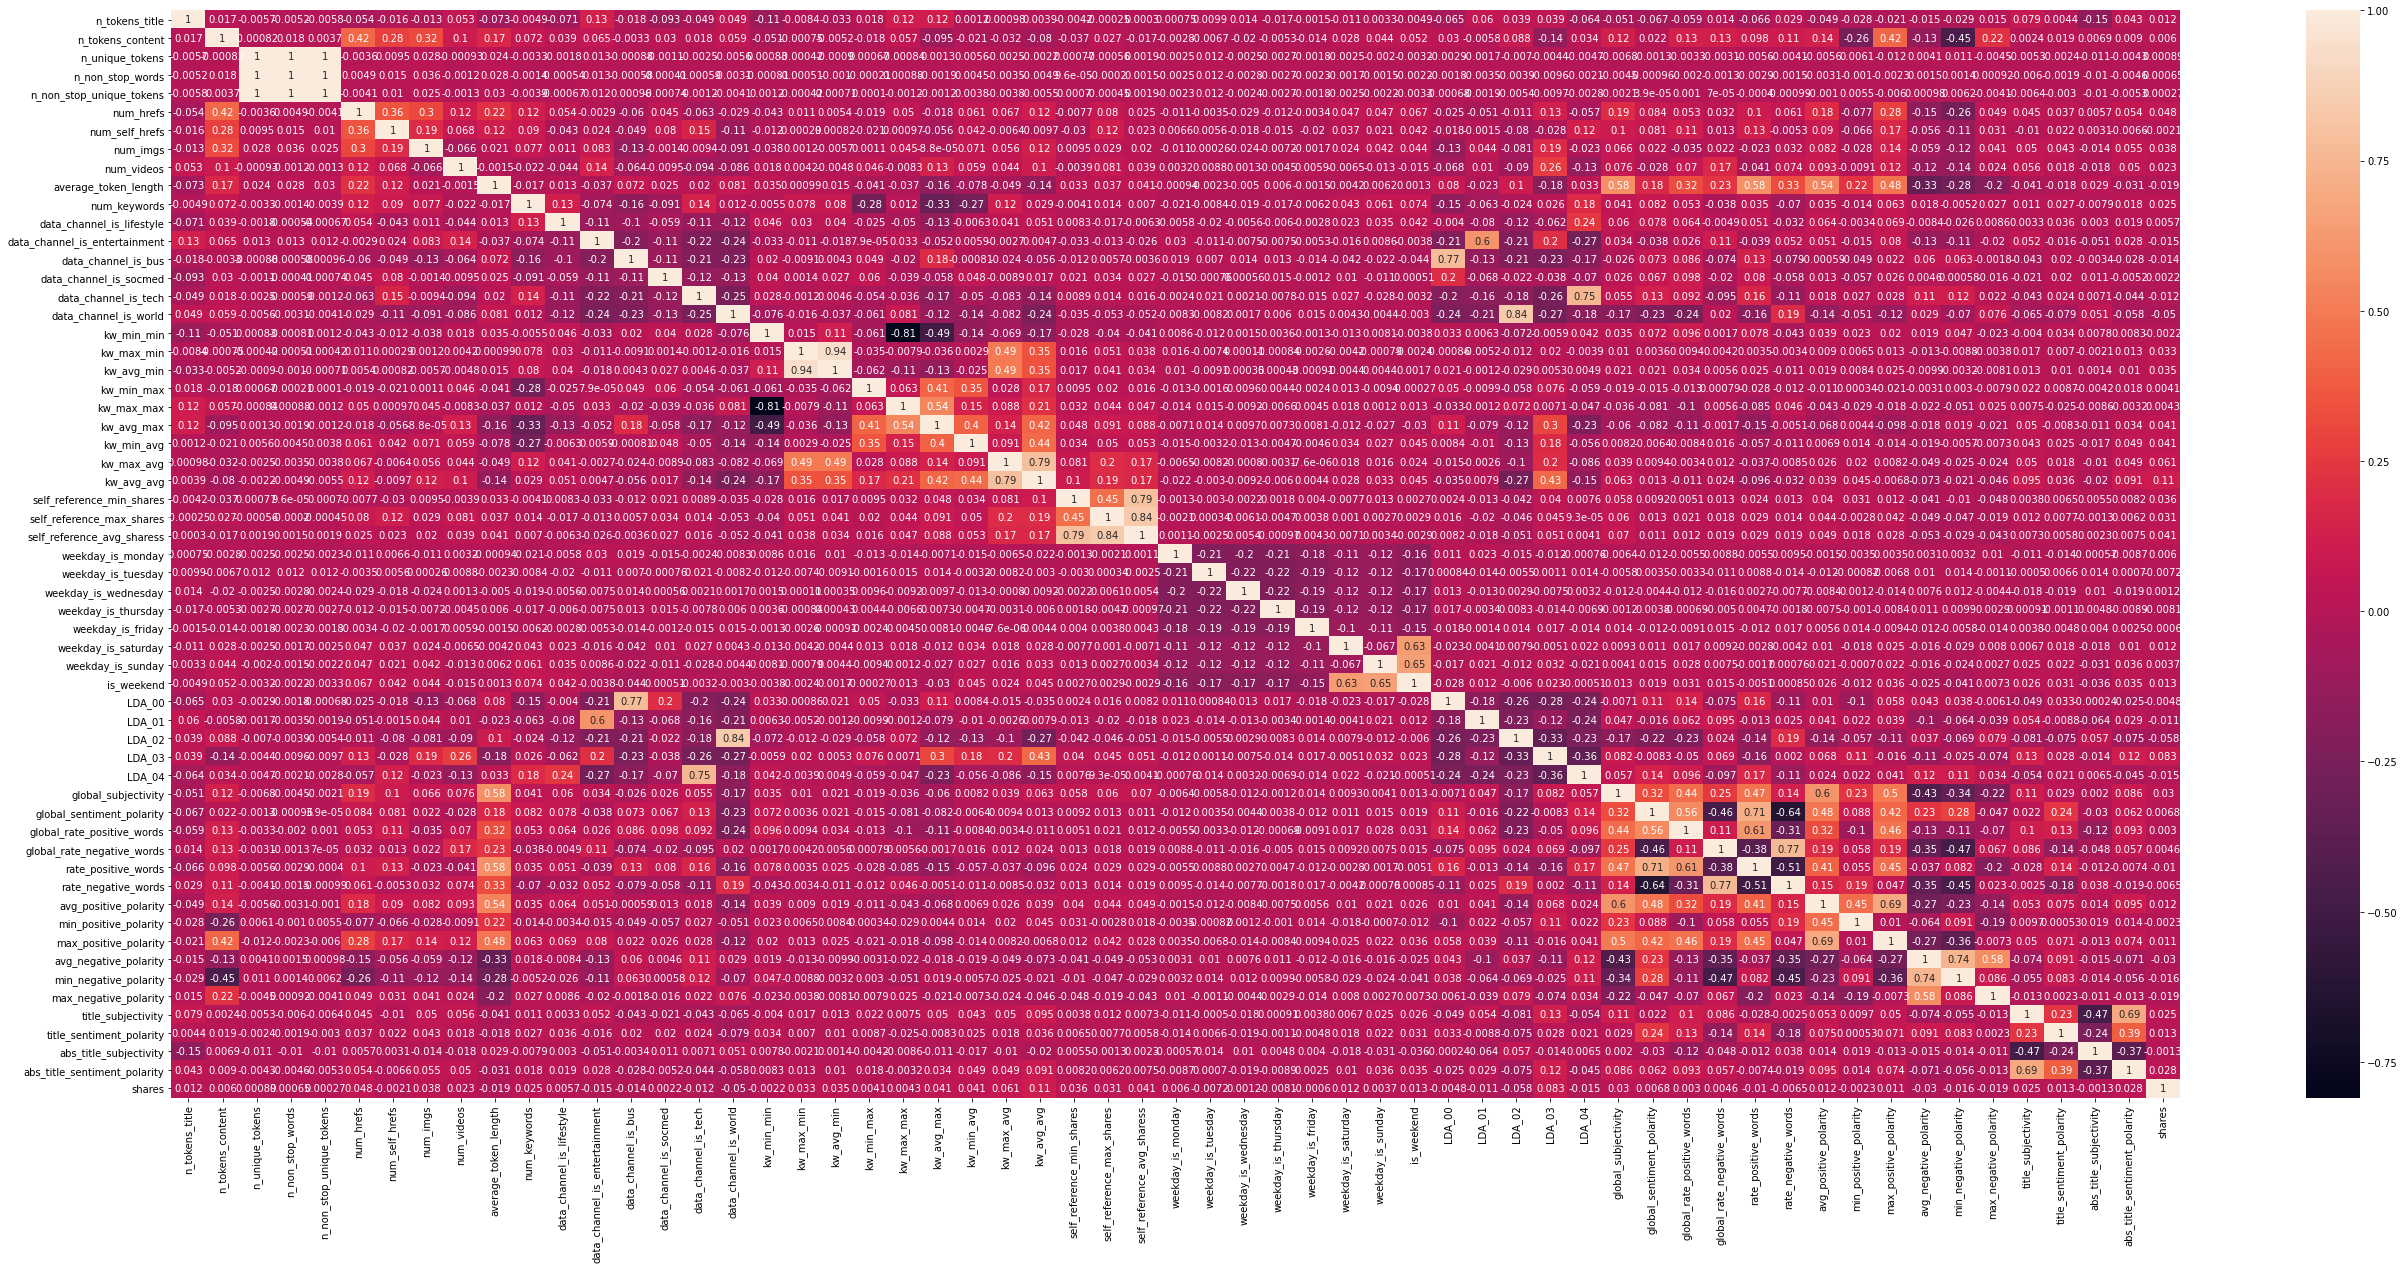

In [22]:
# plotting the feature correlation heatmap
plt.figure(figsize=(45,20))
sns.heatmap(news_train_1.corr(),annot=True)
plt.show()

From the above heatMap, we can see that there is less multicollinearity, so we do not drop any columns yet.

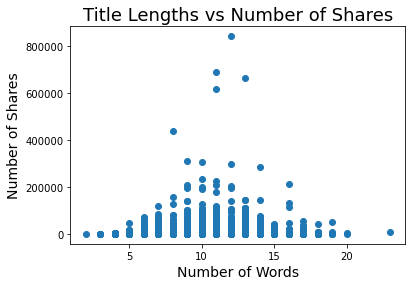

In [23]:
# scatter plot between the number of words in the title and number 
# of shares
plt.scatter(news_train_1["n_tokens_title"],news_train_1["shares"])
plt.title("Title Lengths vs Number of Shares", size=18)
plt.xlabel("Number of Words", size=14)
plt.ylabel("Number of Shares",size=14)
plt.show()

When The number of words in the title increases initially, then the number of shares increases. However, with the increase in the number of words in the title, the number of shares eventually starts to decrease.

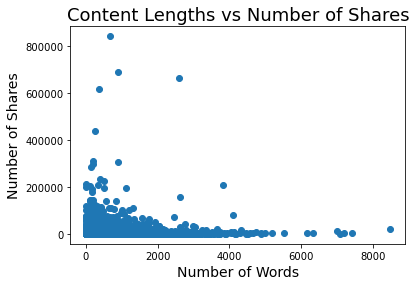

In [24]:
# scatter plot between number of words in the content and number 
# of shares
plt.scatter(news_train_1["n_tokens_content"],news_train_1["shares"])
plt.title("Content Lengths vs Number of Shares",size=18)
plt.xlabel("Number of Words",size=14)
plt.ylabel("Number of Shares",size=14)
plt.show()

When the number of words in the content increases initially between 0 and 2000, then the number of shares also increases within that range.

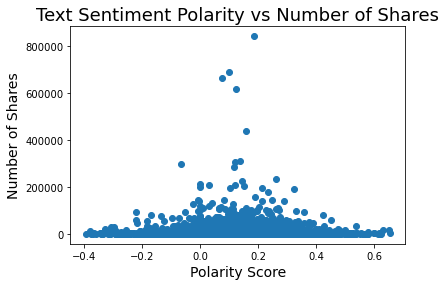

In [25]:
# scatter plot for text sentiment polarity vs number of shares
plt.scatter(news_train_1["global_sentiment_polarity"], news_train_1["shares"])
plt.title("Text Sentiment Polarity vs Number of Shares", size=18)
plt.xlabel("Polarity Score", size=14)
plt.ylabel("Number of Shares", size=14)
plt.show()

When the polarity score is between 0.0 and 0.2, then we have the highest number of shares.

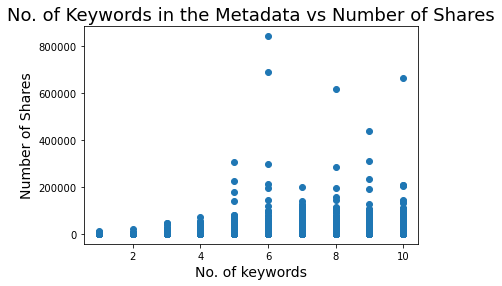

In [26]:
# scatter plot for Number of keywords in the Metadata vs Number 
# of Shares
plt.scatter(news_train_1["num_keywords"], news_train_1["shares"])
plt.title("No. of Keywords in the Metadata vs Number of Shares", size=18)
plt.xlabel("No. of keywords", size=14)
plt.ylabel("Number of Shares", size=14)
plt.show()

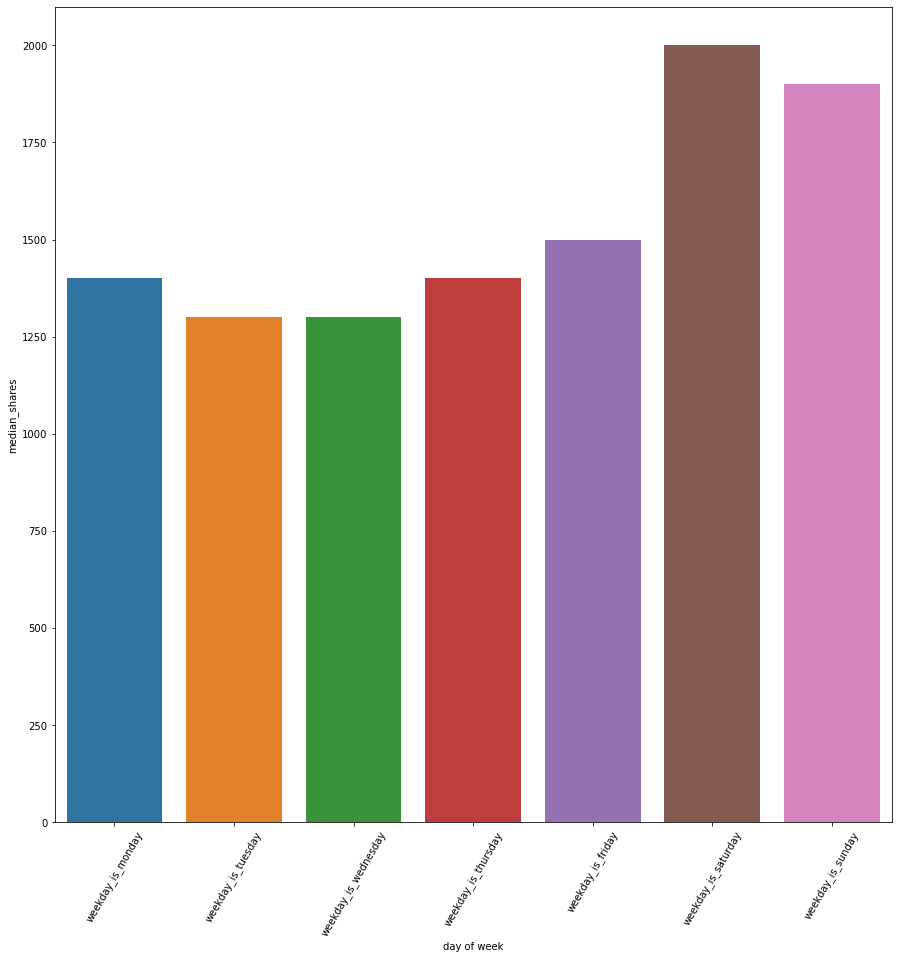

In [27]:
# Plotting barplot for the day of week vs median of shares
plt.figure(figsize=(15,15))
shares = []
cols = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday','weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday']
for k in cols:
    shares.append(news_train_1[news_train_1[k] == 1]['shares'].median())

ax = sns.barplot(x = cols, y = shares)
ax.set(xlabel = 'day of week', ylabel = 'median_shares')
plt.xticks(rotation = 60)
plt.show()

From the Bar Plot above, we can see that number of shares is the maximum on Saturday followed by Sunday.

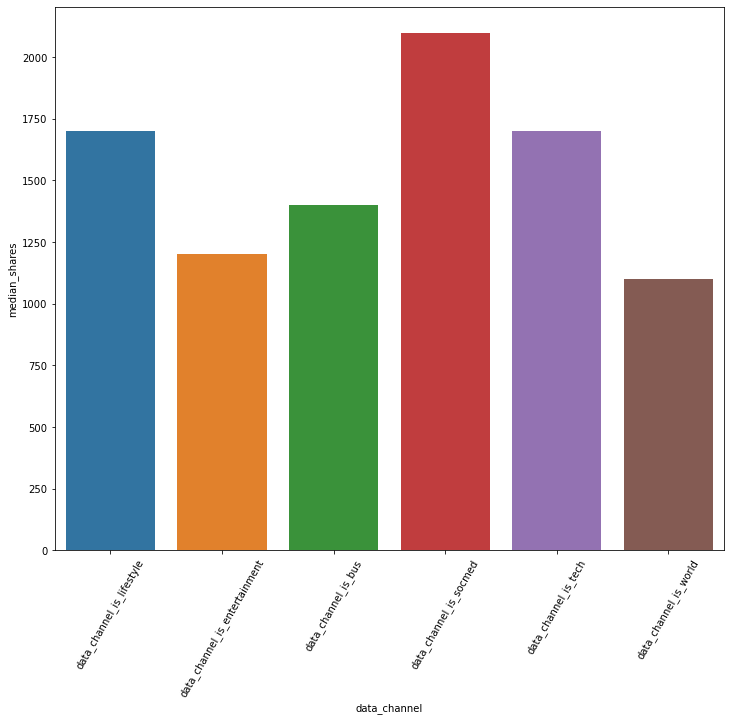

In [28]:
# plotting the bar plot between data channels and the number of shares
plt.figure(figsize= (12,10))
channels = []
cols = ['data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']
for d in cols:
    channels.append(news_train_1[news_train_1[d]==1]['shares'].median())

ax = sns.barplot(x = cols, y = channels)
ax.set(xlabel = 'data_channel', ylabel = 'median_shares')
plt.xticks(rotation = 60)
plt.show()

Most Number of Shares comes from the Data Channel of Social Media.

## Step 5: Outlier Treatment

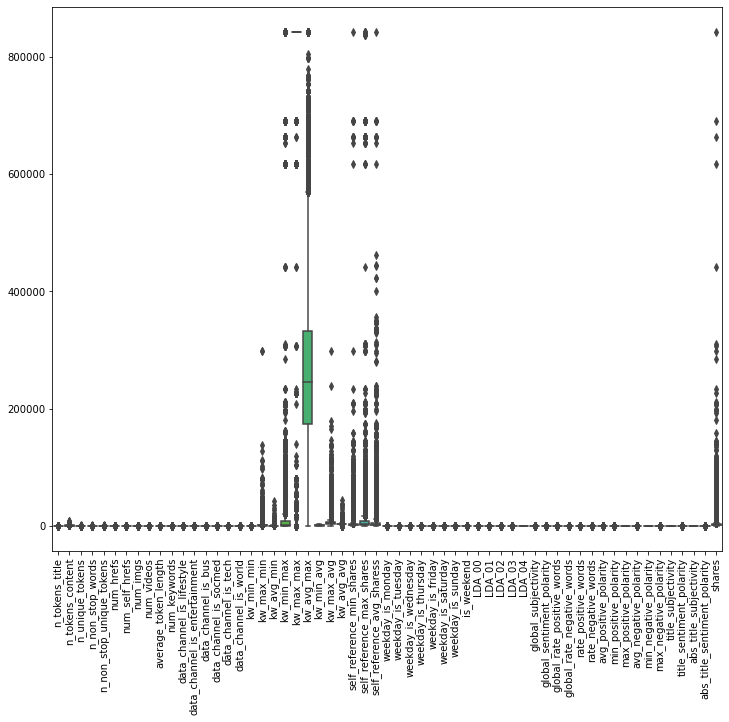

In [29]:
# Checking for Outliers
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)
sns.boxplot(data=news_train_1)
plt.show()

### Here, we can see that there are so many outliers. Now, it's time to handle the outliers.

In [30]:
# To treat the outlier, we use the Quantile based flooring 
# and capping using 10th and 90th percentiles
col_outliers =["kw_max_min","kw_avg_min","kw_min_max","kw_max_max","kw_avg_max","kw_max_avg","kw_avg_avg","self_reference_min_shares","self_reference_max_shares","self_reference_avg_sharess","shares"]
for cols in col_outliers:
    tenth_perc = news_train_1[cols].quantile(0.10)
    ninetieth_perc = news_train_1[cols].quantile(0.90)
    iqr = ninetieth_perc-tenth_perc
    low_range = tenth_perc-1.5*iqr
    high_range = ninetieth_perc+1.5*iqr
    news_train_1 = news_train_1.loc[(news_train_1[cols] > low_range) & (news_train_1[cols] < high_range)]
    
news_train_1.shape    


(22716, 59)

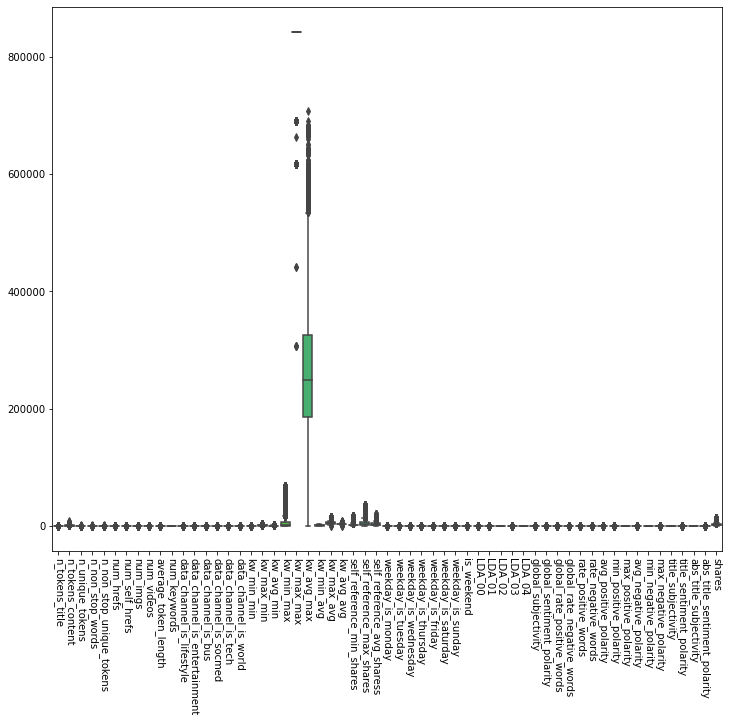

In [31]:
# Checking for Outliers Again using Boxplot
plt.figure(figsize=(12,10))
plt.xticks(rotation=270)
sns.boxplot(data=news_train_1)
plt.show()

### From the above BoxPlot above, there has been a significant reduction in the number of outliers

#### Even if there are less outliers, there are some columns we need to drop.

In [32]:
cols =['kw_min_min',
'kw_max_min',
'kw_avg_min',
'kw_min_max',
'kw_max_max',
'kw_avg_max',
'kw_min_avg',
'kw_max_avg',
'kw_avg_avg',
'self_reference_min_shares',
'self_reference_max_shares',
'num_videos',
'num_hrefs',
'num_self_hrefs',
'num_imgs',
'num_videos','n_tokens_content','self_reference_avg_sharess']
news_train_1=news_train_1.drop(cols,axis=1)

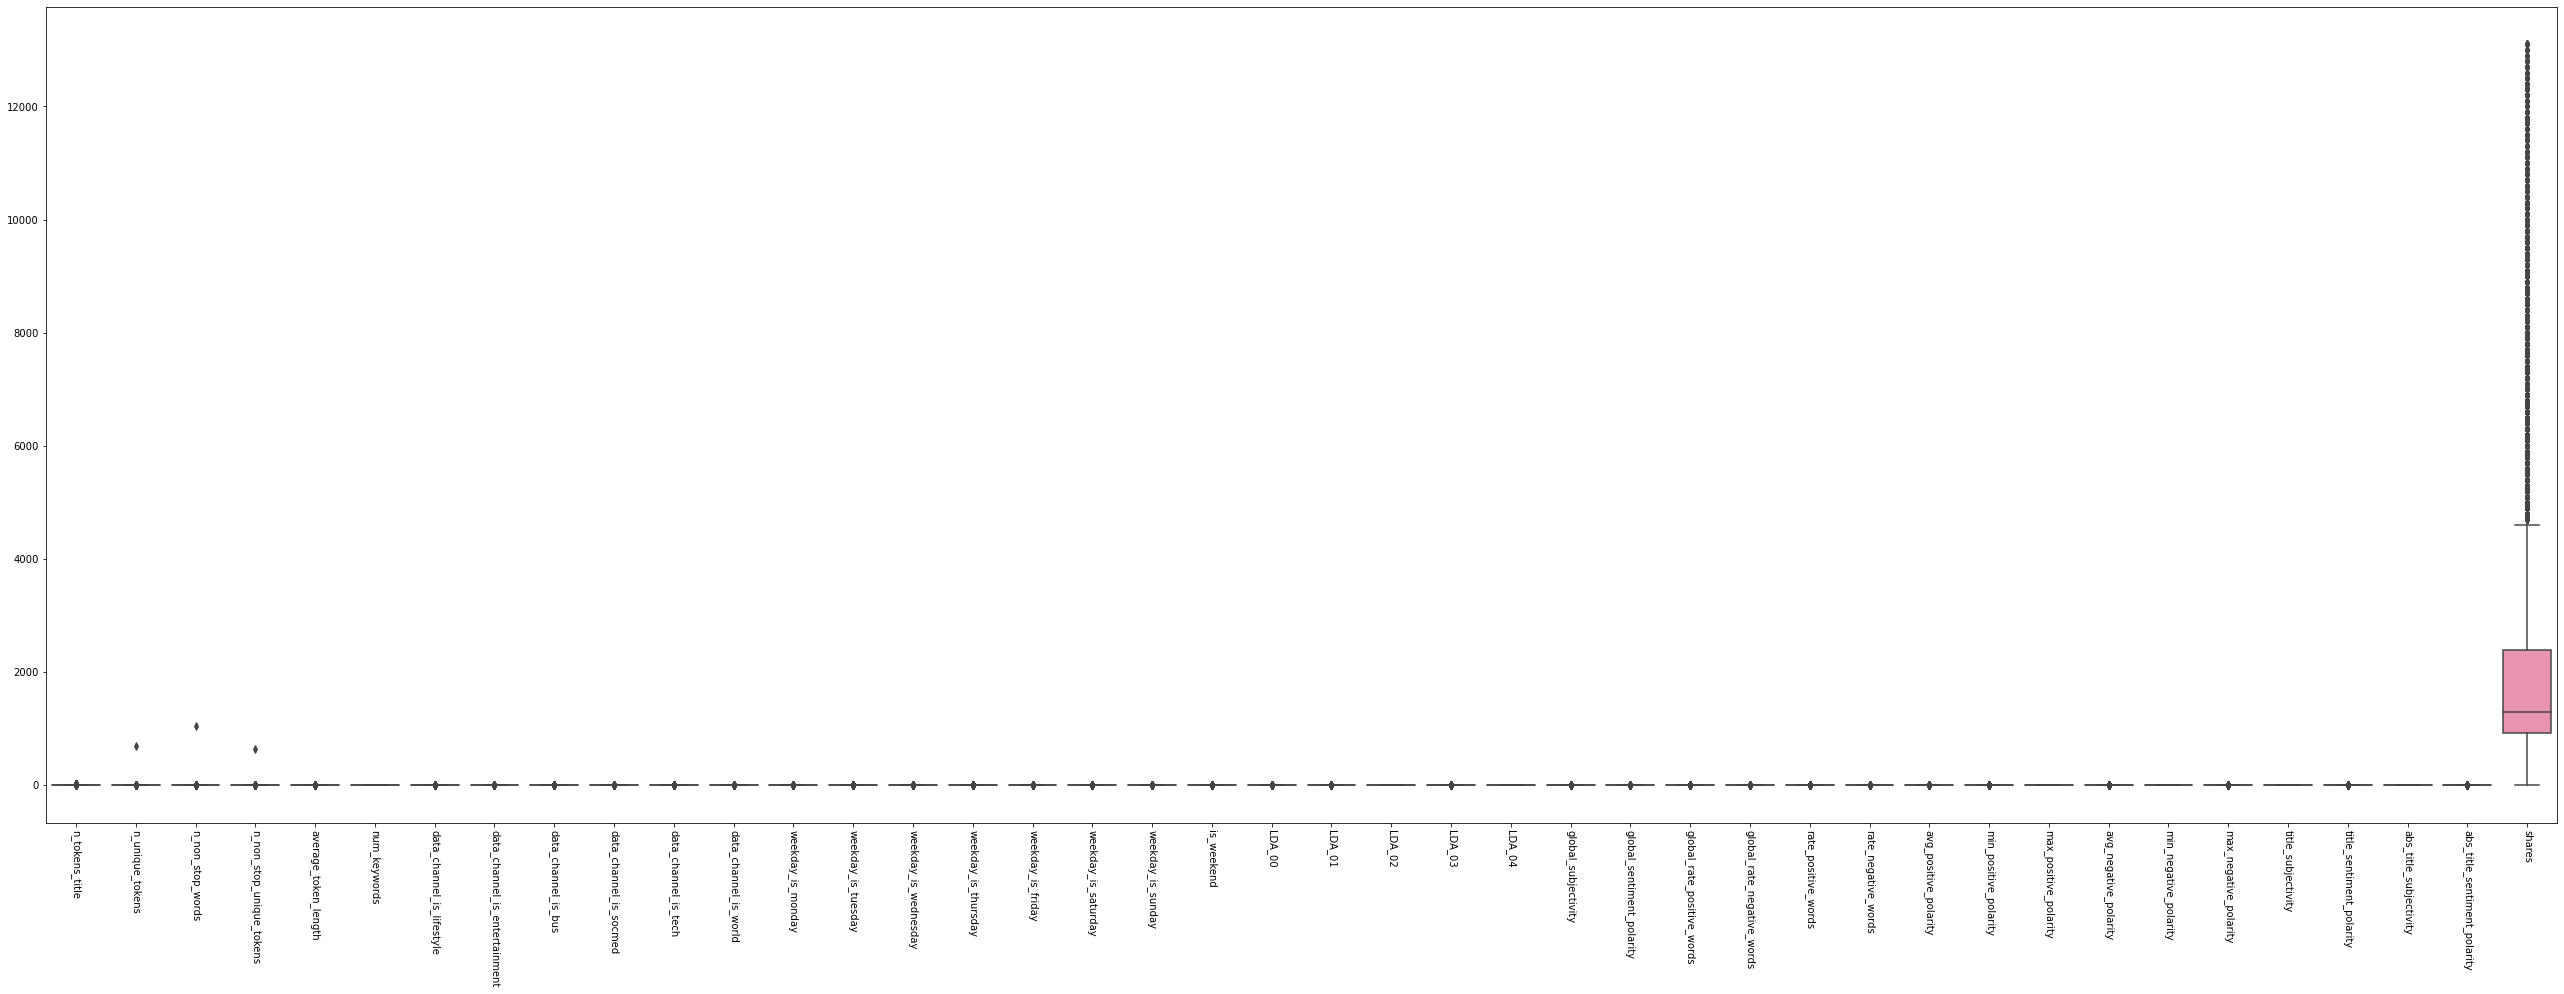

In [33]:
#checking for outliers again
plt.figure(figsize=(45,15))
plt.xticks(rotation=270)
sns.boxplot(data = news_train_1)
plt.show()

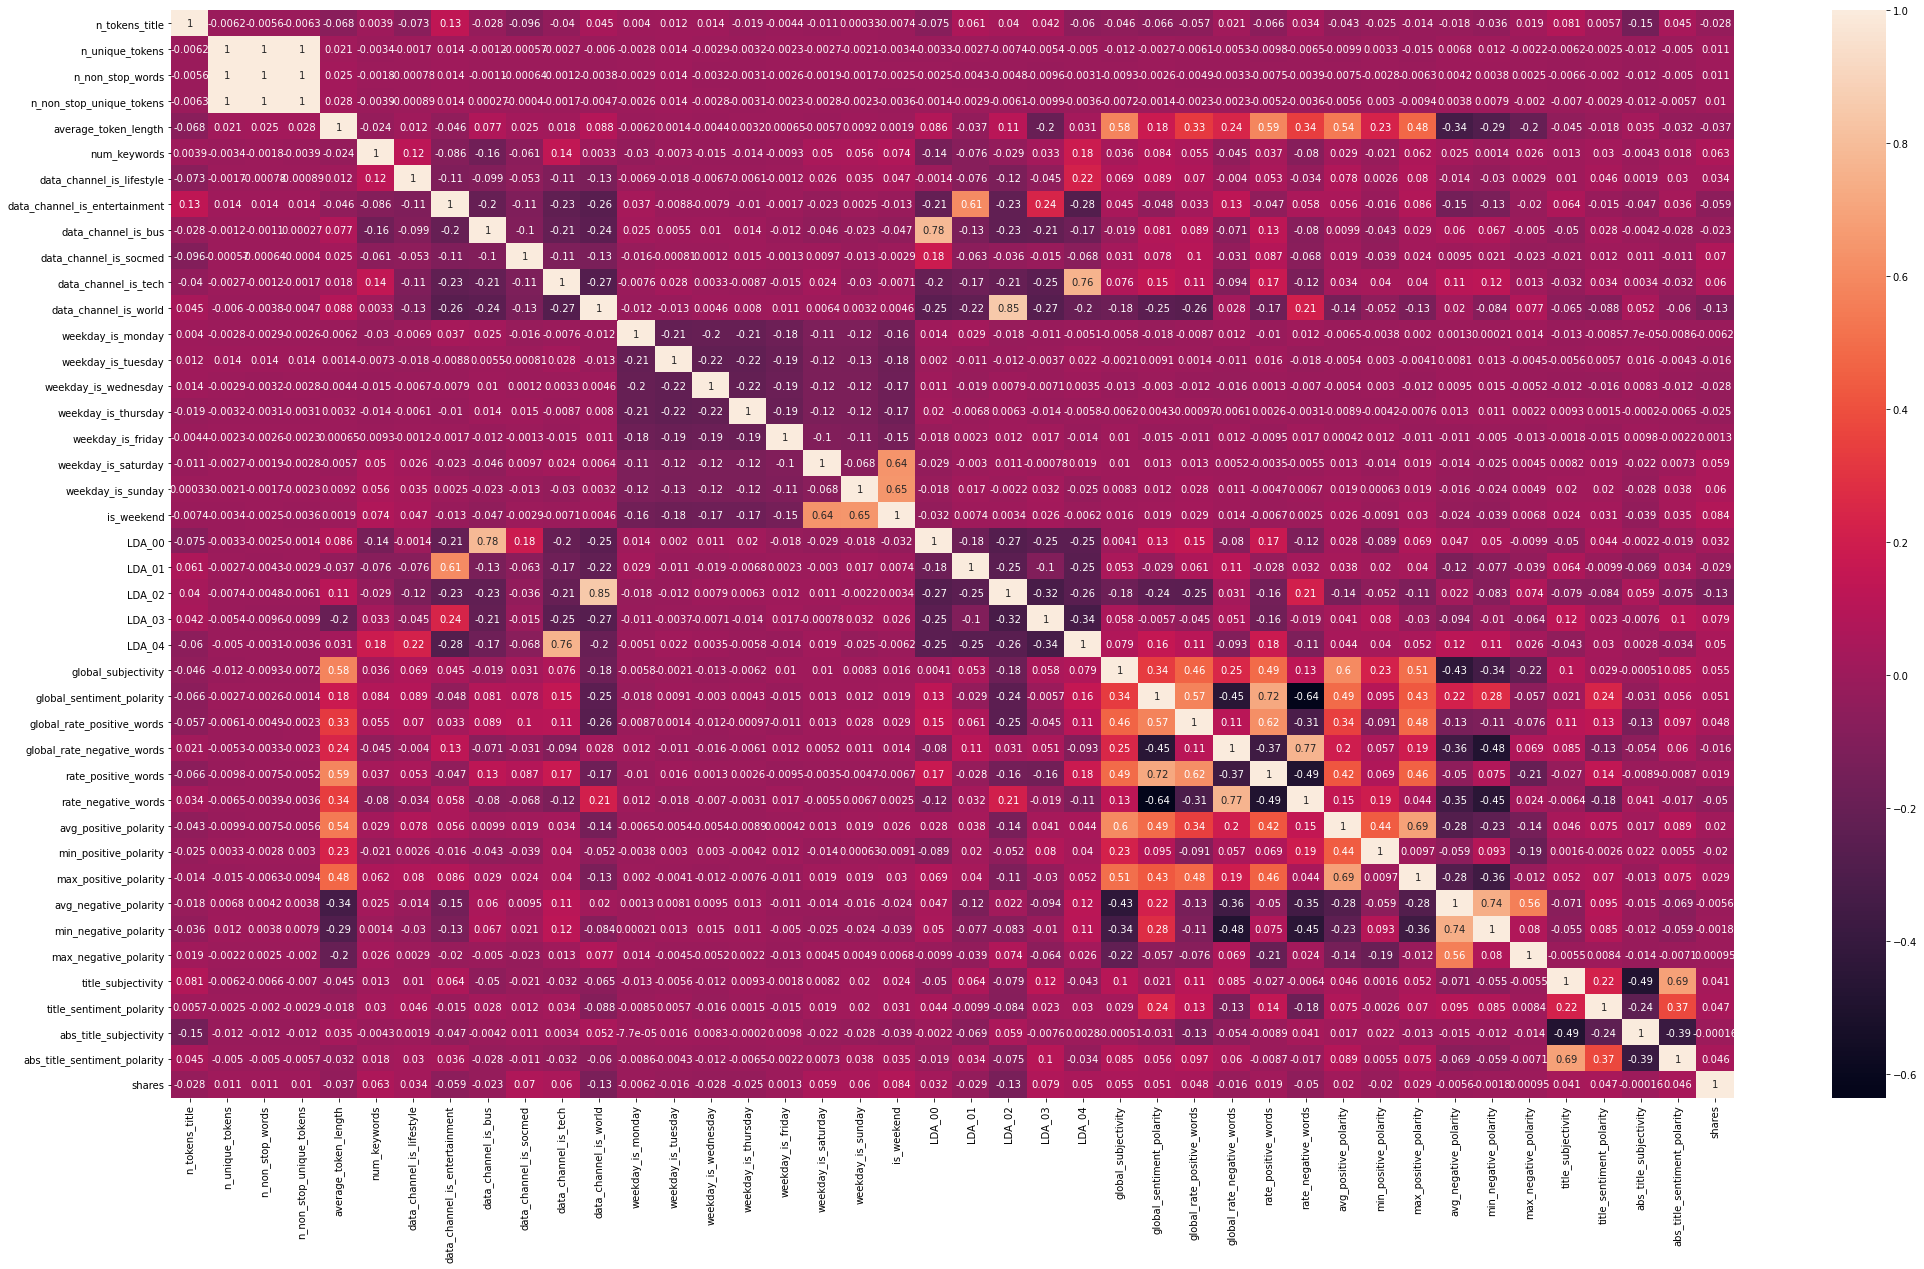

In [34]:
# Looking at the Correlation table Again
plt.figure(figsize=(35,20))
sns.heatmap(news_train_1.corr(),annot=True)
plt.show()

From the above Heatmap, we can see that there are some high correlations among certain features that need to be remove to reduce multicollinearity 

In [35]:
# Removing columns that result in high correlations
cols =['data_channel_is_lifestyle',
'data_channel_is_entertainment',
'data_channel_is_bus',
'data_channel_is_tech',
'data_channel_is_world',
'rate_positive_words',
'rate_negative_words',
'weekday_is_saturday',
'weekday_is_sunday',
'min_negative_polarity',
'title_subjectivity',
'max_positive_polarity']
news_train_1 = news_train_1.drop(cols,axis=1)

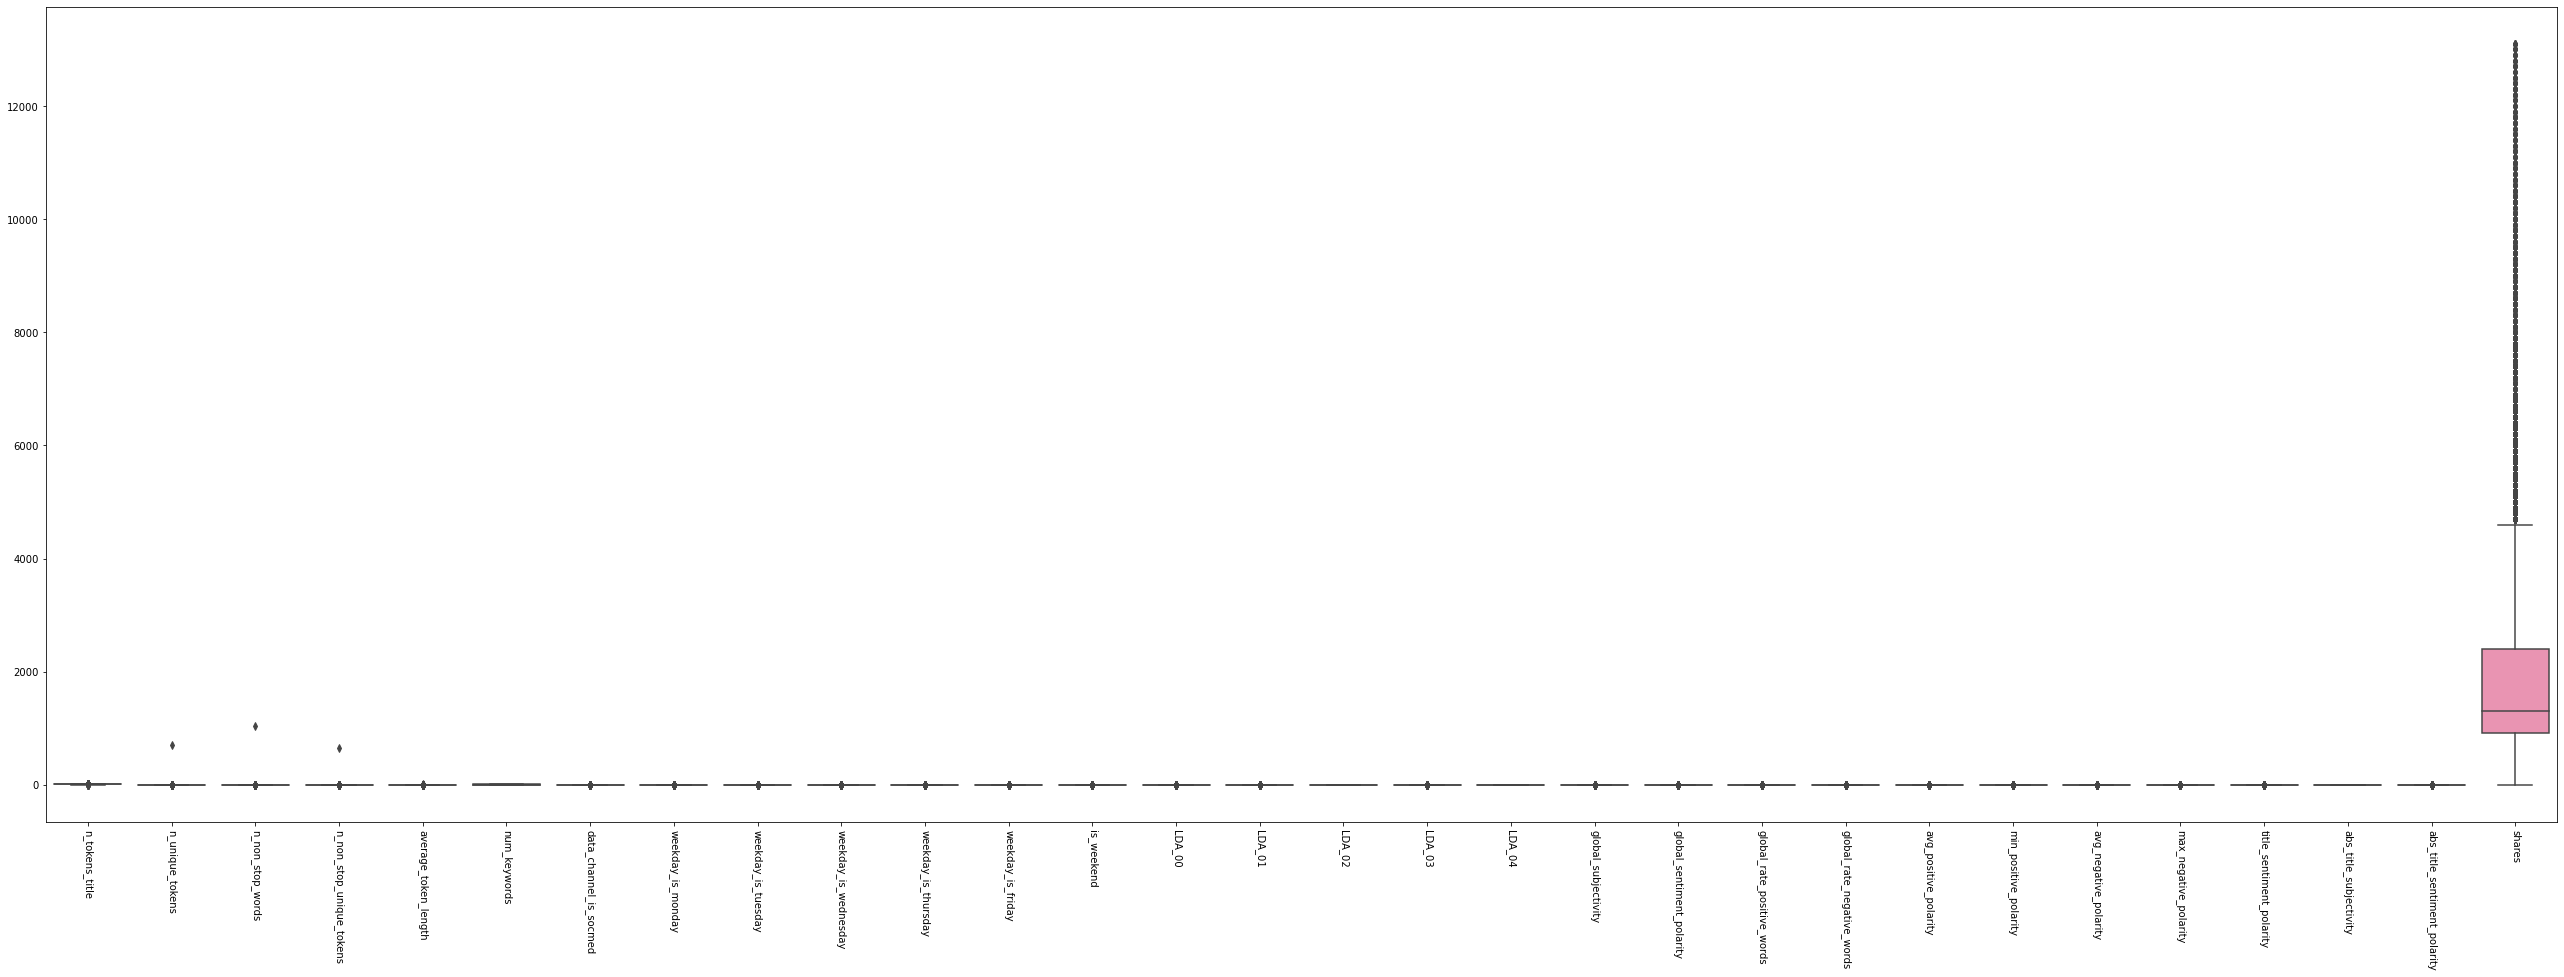

In [36]:
#checking for outliers again
plt.figure(figsize=(45,15))
plt.xticks(rotation=270)
sns.boxplot(data = news_train_1)
plt.show()

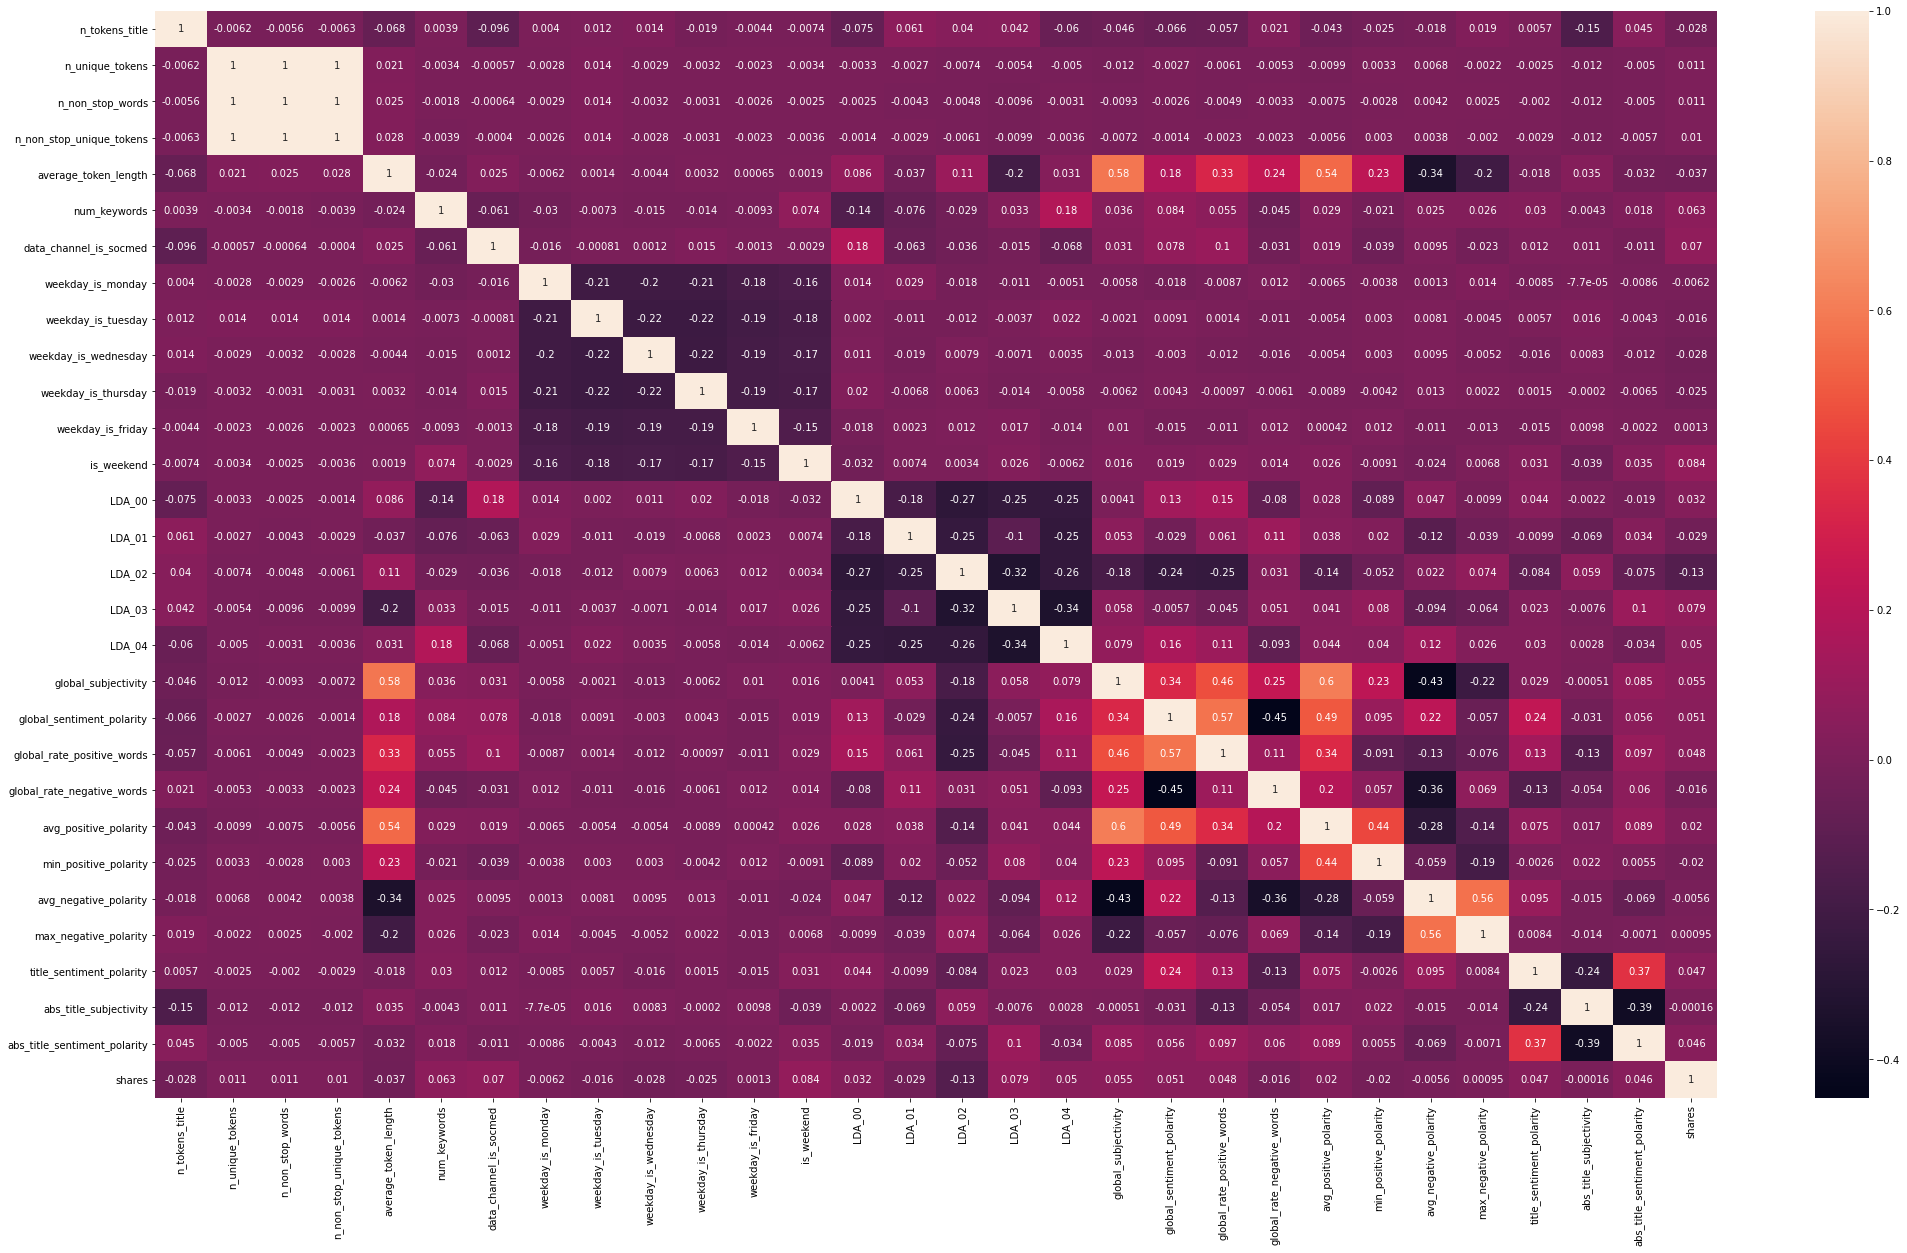

In [37]:
# Looking at the Correlation table Again
plt.figure(figsize=(35,20))
sns.heatmap(news_train_1.corr(),annot=True)
plt.show()

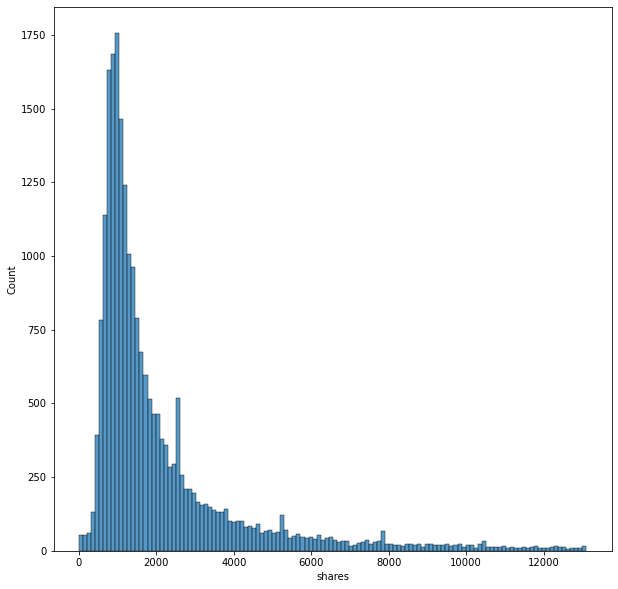

In [38]:
# Checking the distribution of the Target Variable
plt.figure(figsize=(10,10))
sns.histplot(news_train_1['shares'])
plt.show()

#### Looks like all the features are positively skewed. So, we will use Log Transform to neutralize the positive skewness.

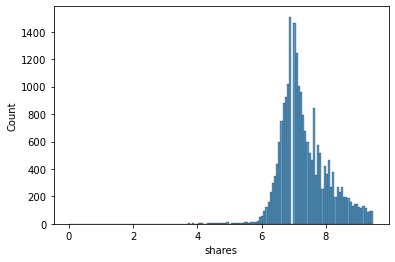

In [39]:
y=news_train_1['shares']
y= np.log(y)
sns.histplot(y)
plt.show()

## Step 6: Scaling

In [40]:
scaler = StandardScaler()
news_train_1[:] = scaler.fit_transform(news_train_1)

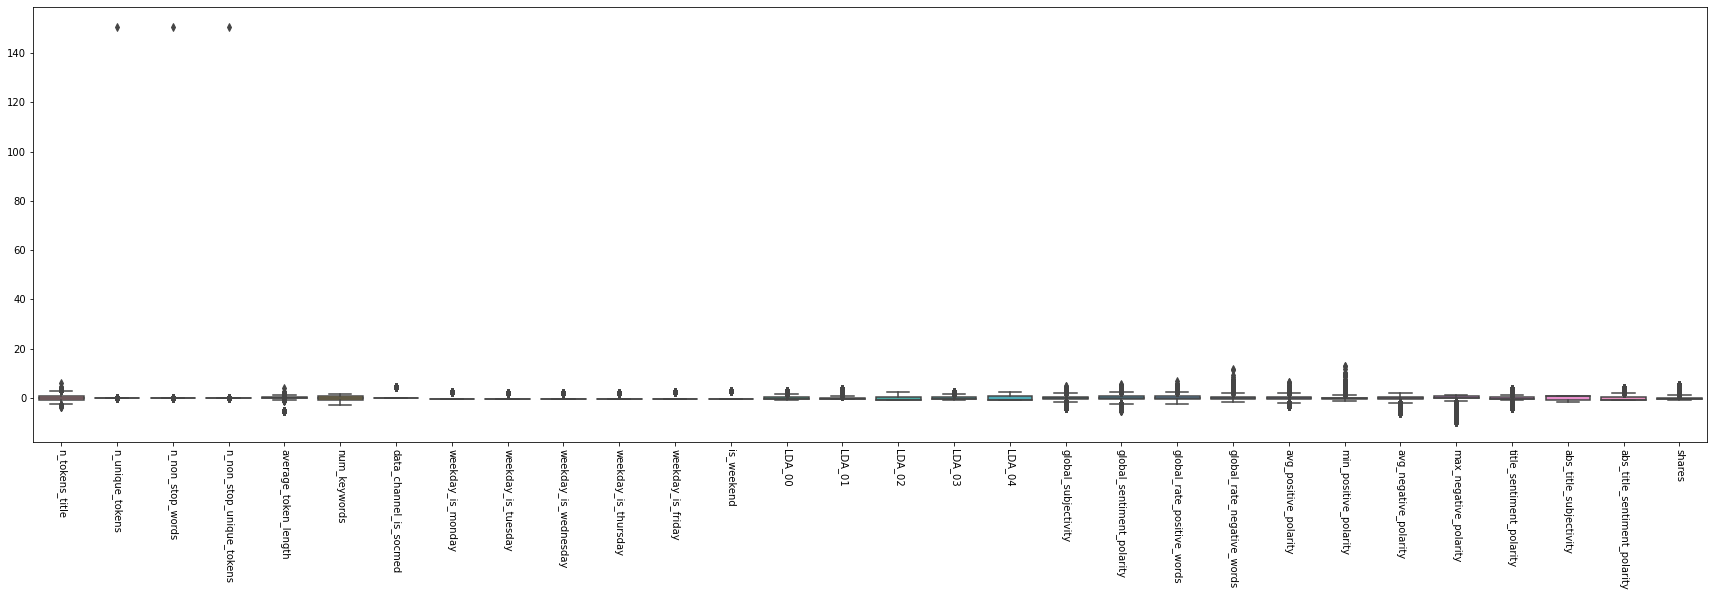

In [41]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=270)
sns.boxplot(data = news_train_1)
plt.show()

## Step 7: Model Building

#### Performing the Train Test Split

In [74]:
news_train_1.shape

(22716, 30)

In [75]:
X= news_train_1.drop('shares',1)

In [76]:
X.head()

,n_tokens_title,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,num_keywords,data_channel_is_socmed,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,min_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
2,-1.621333,0.017420,-0.00202,0.011069,0.332646,0.396266,-0.232503,-0.436896,-0.475154,-0.464472,-0.470066,2.485864,-0.370742,-0.598147,-0.528080,-0.713554,-0.626387,2.263255,-0.766672,-0.002890,-0.244614,0.520083,0.043245,-0.643630,-0.041494,-0.683627,-0.258124,0.815224,-0.658567
3,-0.681008,-0.003231,-0.00202,0.012538,0.107627,-0.145900,-0.232503,-0.436896,-0.475154,2.152981,-0.470066,-0.402275,-0.370742,-0.584702,-0.512138,-0.701379,-0.123142,1.740865,0.969605,1.449460,1.539963,-0.560419,0.059972,0.602397,0.703991,0.053409,-0.258124,0.815224,-0.658567
4,1.199644,-0.011223,-0.00202,-0.005200,0.158243,-1.772399,-0.232503,-0.436896,-0.475154,-0.464472,2.127361,-0.402275,-0.370742,-0.503199,-0.405449,-0.627946,2.114306,-0.647928,-0.027660,0.420826,0.110292,-0.612556,0.157933,-0.884091,0.498862,0.053409,0.385711,-1.225499,0.102673
5,0.259318,0.031790,-0.00202,0.020171,0.337932,0.938433,-0.232503,2.288874,-0.475154,-0.464472,-0.470066,-0.402275,-0.370742,-0.608078,-0.539036,-0.722362,1.720114,0.023744,1.126691,-0.579478,-0.948854,0.070047,-0.246138,0.077754,-1.330562,-0.683627,-0.258124,0.815224,-0.658567
6,-0.210845,-0.012345,-0.00202,-0.008188,-0.116387,-0.688066,-0.232503,-0.436896,-0.475154,-0.464472,-0.470066,2.485864,-0.370742,-0.566540,-0.490700,-0.685153,-0.596807,2.149221,-0.565203,0.432198,0.063265,-0.802928,-0.454395,-0.884091,-0.420892,0.053409,-0.258124,0.815224,-0.658567


In [77]:
X.shape

(22716, 29)

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(15901, 29) (15901,)
(6815, 29) (6815,)


In [79]:
X_train.head()

,n_tokens_title,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,num_keywords,data_channel_is_socmed,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,min_positive_polarity,avg_negative_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
713,-0.210845,-0.008388,-0.00202,-0.008465,0.579023,1.480599,-0.232503,-0.436896,-0.475154,-0.464472,-0.470066,-0.402275,2.697297,-0.616981,2.708238,-0.531738,-0.644009,-0.347756,0.951092,0.477860,-0.300238,-0.487891,0.753048,0.077754,-0.558769,0.053409,-0.258124,0.815224,-0.658567
9254,-1.151170,-0.049730,-0.00202,-0.052928,-0.074759,1.480599,-0.232503,-0.436896,-0.475154,2.152981,-0.470066,-0.402275,-0.370742,-0.617086,3.500322,-0.730576,-0.644049,-0.750125,0.446229,-0.244840,0.485271,0.996609,0.176119,-0.643630,-0.224924,0.369282,0.514479,-1.846588,0.254921
1524,0.729481,-0.012908,-0.00202,-0.006754,0.152821,-1.772399,-0.232503,-0.436896,-0.475154,-0.464472,2.127361,-0.402275,-0.370742,2.349176,-0.415486,-0.628127,-0.537340,-0.648050,-0.656832,-0.008191,-0.387818,-0.098624,-0.158659,-0.884091,0.635458,0.053409,-0.258124,0.815224,-0.658567
11370,-0.210845,-0.007388,-0.00202,-0.013320,0.311082,1.480599,-0.232503,-0.436896,-0.475154,2.152981,-0.470066,-0.402275,-0.370742,0.658142,-0.550675,-0.730077,1.356940,-0.749057,0.305212,0.066619,-0.738475,-0.667770,0.175746,-0.884091,-1.073192,-0.913951,-0.258124,0.815224,-0.658567
15950,-1.621333,-0.005387,-0.00202,0.009233,0.314178,0.396266,-0.232503,-0.436896,-0.475154,-0.464472,-0.470066,2.485864,-0.370742,-0.097059,-0.528202,-0.289336,-0.626350,1.385280,1.040155,0.231874,-0.129983,0.372458,0.829508,1.520522,-0.138512,0.237668,-0.258124,0.815224,-0.658567


In [80]:
X_train.columns

Index(['n_tokens_title', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'average_token_length', 'num_keywords',
       'data_channel_is_socmed', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'avg_positive_polarity', 'min_positive_polarity',
       'avg_negative_polarity', 'max_negative_polarity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [81]:
X_train.shape

(15901, 29)

### Feature Engineering & Selection

In [82]:
# Importing RFE for feature selection 
#where we will choose 15 components
from sklearn.feature_selection import RFE
lr = LinearRegression()

In [83]:
rfe = RFE(estimator=lr,n_features_to_select=15)
rfe = rfe.fit(X_train,Y_train)

In [84]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('n_tokens_title', False, 10),
 ('n_unique_tokens', True, 1),
 ('n_non_stop_words', True, 1),
 ('n_non_stop_unique_tokens', True, 1),
 ('average_token_length', True, 1),
 ('num_keywords', True, 1),
 ('data_channel_is_socmed', True, 1),
 ('weekday_is_monday', False, 5),
 ('weekday_is_tuesday', True, 1),
 ('weekday_is_wednesday', False, 2),
 ('weekday_is_thursday', False, 4),
 ('weekday_is_friday', False, 15),
 ('is_weekend', True, 1),
 ('LDA_00', True, 1),
 ('LDA_01', True, 1),
 ('LDA_02', True, 1),
 ('LDA_03', True, 1),
 ('LDA_04', True, 1),
 ('global_subjectivity', True, 1),
 ('global_sentiment_polarity', False, 7),
 ('global_rate_positive_words', False, 12),
 ('global_rate_negative_words', False, 8),
 ('avg_positive_polarity', False, 14),
 ('min_positive_polarity', False, 3),
 ('avg_negative_polarity', False, 13),
 ('max_negative_polarity', False, 11),
 ('title_sentiment_polarity', True, 1),
 ('abs_title_subjectivity', False, 6),
 ('abs_title_sentiment_polarity', False, 9)]

In [85]:
# The columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'average_token_length', 'num_keywords', 'data_channel_is_socmed',
       'weekday_is_tuesday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'title_sentiment_polarity'],
      dtype='object')

In [86]:
# We will use the above columns for X Train 
# and create a new DataFrame
X_train_rfe = X_train[col]
X_train_rfe.head()

,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,num_keywords,data_channel_is_socmed,weekday_is_tuesday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,title_sentiment_polarity
713,-0.008388,-0.00202,-0.008465,0.579023,1.480599,-0.232503,-0.475154,2.697297,-0.616981,2.708238,-0.531738,-0.644009,-0.347756,0.951092,-0.258124
9254,-0.049730,-0.00202,-0.052928,-0.074759,1.480599,-0.232503,-0.475154,-0.370742,-0.617086,3.500322,-0.730576,-0.644049,-0.750125,0.446229,0.514479
1524,-0.012908,-0.00202,-0.006754,0.152821,-1.772399,-0.232503,-0.475154,-0.370742,2.349176,-0.415486,-0.628127,-0.537340,-0.648050,-0.656832,-0.258124
11370,-0.007388,-0.00202,-0.013320,0.311082,1.480599,-0.232503,-0.475154,-0.370742,0.658142,-0.550675,-0.730077,1.356940,-0.749057,0.305212,-0.258124
15950,-0.005387,-0.00202,0.009233,0.314178,0.396266,-0.232503,-0.475154,-0.370742,-0.097059,-0.528202,-0.289336,-0.626350,1.385280,1.040155,-0.258124


In [87]:
# We will use the above columns for X Test 
# and create a new DataFrame
X_test_rfe = X_test[col]
X_test_rfe.head()

,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,num_keywords,data_channel_is_socmed,weekday_is_tuesday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,title_sentiment_polarity
20584,-0.014869,-0.00202,-0.017848,0.595196,0.396266,-0.232503,-0.475154,2.697297,-0.597159,-0.528234,1.353891,-0.626376,0.182138,0.430366,-0.258124
15907,0.042827,-0.00202,0.042983,0.008126,0.938433,-0.232503,-0.475154,-0.370742,-0.607614,-0.540520,-0.317229,-0.636149,1.891872,-0.351634,-0.741001
13005,-0.002208,-0.00202,0.006893,0.673807,-0.688066,-0.232503,2.104579,-0.370742,1.277838,-0.490714,0.501182,-0.596813,-0.705134,-0.112828,-0.258124
7149,-0.041577,-0.00202,-0.032835,0.382990,1.480599,-0.232503,-0.475154,-0.370742,-0.617320,-0.550759,2.333111,-0.644125,-0.750759,-0.789336,-0.258124
24303,0.013200,-0.00202,0.015610,0.592128,-0.688066,-0.232503,-0.475154,-0.370742,-0.565877,0.261221,-0.685001,-0.596735,1.576376,0.017294,-0.258124


In [89]:
# Now is the time to apply PCA with the selected columns data frame
pca = PCA(random_state=42)
pca.fit_transform(X_train_rfe)

array([[-3.31798829e-02, -7.71279223e-01, -5.52501413e-02, ...,
         2.44307049e-03,  3.42867977e-03,  1.18057402e-04],
       [-7.90402289e-02,  9.81100273e-02,  5.03610745e-01, ...,
         4.03329571e-02, -4.22997670e-04, -2.96621710e-05],
       [-4.25082459e-03, -2.79674784e-02,  1.94729636e+00, ...,
         9.64570845e-03, -3.03040551e-03, -1.15452688e-05],
       ...,
       [ 2.59276335e-02, -1.16157039e+00, -2.12572949e+00, ...,
        -3.35346157e-02,  7.66052737e-03, -1.51962004e-05],
       [-4.43242927e-02, -4.81441335e-01,  1.97081120e-02, ...,
         3.10819466e-02, -4.79988323e-03,  1.07329357e-04],
       [ 1.69347625e-02, -8.31172721e-01,  1.05939432e+00, ...,
        -1.49159299e-02, -5.53272191e-03,  5.79030433e-05]])

In [90]:
# Set of all eigen vectors for each principal component
pca.components_

array([[ 5.77240822e-01,  5.77245732e-01,  5.77213571e-01,
         1.20001595e-02, -2.24621610e-03, -6.06433105e-04,
         1.07710035e-02, -2.96034671e-03, -9.56245295e-04,
        -2.49715357e-03, -2.51359881e-03, -5.74000662e-03,
        -2.28433435e-03, -8.70411039e-03, -1.81683345e-03],
       [ 5.18569720e-03,  1.53174291e-03, -1.58114252e-04,
        -6.57883336e-01, -3.79741826e-02, -9.34048029e-02,
        -1.22998021e-02,  6.84894229e-04, -1.58644778e-01,
         8.68015744e-02,  5.00861574e-02,  2.89549325e-01,
        -2.53588588e-01, -6.10113499e-01, -3.53020656e-02],
       [ 8.68391800e-04, -1.21319809e-03,  6.78184071e-04,
         5.25135698e-02, -3.81166442e-01,  3.23616220e-01,
         8.16166886e-03, -5.04248036e-02,  4.74003991e-01,
         2.46855526e-01, -3.07029625e-01,  2.38350855e-01,
        -5.35710230e-01,  1.37107745e-01,  4.62094182e-02],
       [ 5.53549835e-03,  3.69747707e-03,  3.69601704e-03,
        -7.13099012e-02,  2.84889153e-01, -1.69294630

In [91]:
# explains the variance or information about 
# each principal components
pca.explained_variance_ratio_

array([2.62494893e-01, 1.01995855e-01, 9.10151564e-02, 8.89453410e-02,
       7.94827315e-02, 7.27649728e-02, 6.82798814e-02, 5.98772307e-02,
       5.44845658e-02, 5.12721809e-02, 4.90039663e-02, 2.03616747e-02,
       1.81467497e-05, 3.40317894e-06, 2.87981976e-10])

<BarContainer object of 15 artists>

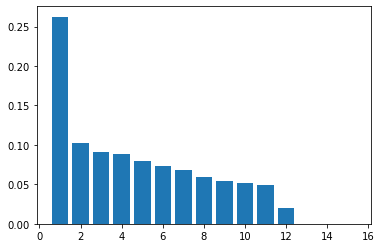

In [92]:
# Displaying Bar Plot for explained variance ratio for 15 components
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)

In [93]:
# variance cumulative
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.26249489, 0.36449075, 0.4555059 , 0.54445125, 0.62393398,
       0.69669895, 0.76497883, 0.82485606, 0.87934063, 0.93061281,
       0.97961678, 0.99997845, 0.9999966 , 1.        , 1.        ])

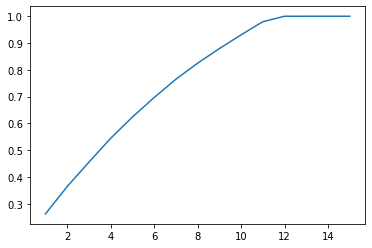

In [94]:
# Creating a Scree Plot X-axis:Number of components
# and Y-axis: Total Variance Explained
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),var_cumu)

from the Above Scree plot, we just need to retain the first 11 Principal Components that provide total variance or maximum information about the data set.

In [95]:
# Now Let's see the two components of PCA
components_2 = pd.DataFrame({'PC1':pca.components_[0]
                            ,'PC2':pca.components_[1]
                            ,'Feature':X_train_rfe.columns})
components_2

,PC1,PC2,Feature
0,0.577241,0.005186,n_unique_tokens
1,0.577246,0.001532,n_non_stop_words
2,0.577214,-0.000158,n_non_stop_unique_tokens
3,0.012000,-0.657883,average_token_length
4,-0.002246,-0.037974,num_keywords
5,-0.000606,-0.093405,data_channel_is_socmed
6,0.010771,-0.012300,weekday_is_tuesday
7,-0.002960,0.000685,is_weekend
8,-0.000956,-0.158645,LDA_00
9,-0.002497,0.086802,LDA_01


In [96]:
#creating a dataframe for PCA on selected RFE columns
cols = list(X_train_rfe.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],'Features':cols})

In [97]:
# Creating a new data frame on 11 features for Train data
X_train_pca = X_train_rfe[pca_df.Features[:11]]
X_train_pca.head()

,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,num_keywords,data_channel_is_socmed,weekday_is_tuesday,is_weekend,LDA_00,LDA_01,LDA_02
713,-0.008388,-0.00202,-0.008465,0.579023,1.480599,-0.232503,-0.475154,2.697297,-0.616981,2.708238,-0.531738
9254,-0.049730,-0.00202,-0.052928,-0.074759,1.480599,-0.232503,-0.475154,-0.370742,-0.617086,3.500322,-0.730576
1524,-0.012908,-0.00202,-0.006754,0.152821,-1.772399,-0.232503,-0.475154,-0.370742,2.349176,-0.415486,-0.628127
11370,-0.007388,-0.00202,-0.013320,0.311082,1.480599,-0.232503,-0.475154,-0.370742,0.658142,-0.550675,-0.730077
15950,-0.005387,-0.00202,0.009233,0.314178,0.396266,-0.232503,-0.475154,-0.370742,-0.097059,-0.528202,-0.289336


In [98]:
# Creating a new data frame on 11 features for Test data
X_test_pca = X_test_rfe[pca_df.Features[:11]]
X_test_pca.head()

,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,num_keywords,data_channel_is_socmed,weekday_is_tuesday,is_weekend,LDA_00,LDA_01,LDA_02
20584,-0.014869,-0.00202,-0.017848,0.595196,0.396266,-0.232503,-0.475154,2.697297,-0.597159,-0.528234,1.353891
15907,0.042827,-0.00202,0.042983,0.008126,0.938433,-0.232503,-0.475154,-0.370742,-0.607614,-0.540520,-0.317229
13005,-0.002208,-0.00202,0.006893,0.673807,-0.688066,-0.232503,2.104579,-0.370742,1.277838,-0.490714,0.501182
7149,-0.041577,-0.00202,-0.032835,0.382990,1.480599,-0.232503,-0.475154,-0.370742,-0.617320,-0.550759,2.333111
24303,0.013200,-0.00202,0.015610,0.592128,-0.688066,-0.232503,-0.475154,-0.370742,-0.565877,0.261221,-0.685001


In [99]:
X_train_pca.shape

(15901, 11)

In [100]:
X_test_pca.shape

(6815, 11)

In [101]:
# now doing final PCA with 11 components

pca_final = IncrementalPCA(n_components=11)
df_train_pca = pca_final.fit_transform(X_train_pca)
df_train_pca.shape

(15901, 11)

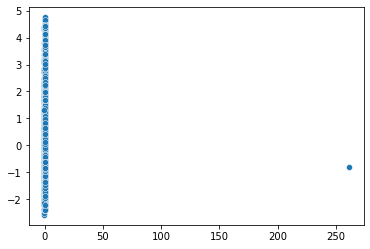

In [102]:
# Plotting first 2 PCA components
sns.scatterplot(x=df_train_pca[:,0], y=df_train_pca[:,1])
plt.show()